In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("train.csv")
pair_data = pd.read_csv("pairs.csv")

In [3]:
# Listing some data
data.head(10)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
5,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,NaN,Spas,P_020de174484ec6
6,E_00002a131a2bf6,ministry of youth,29.364352,47.971362,NaN,NaN,NaN,NaN,KW,NaN,NaN,Capitol Buildings,P_9e4e64be602c35
7,E_0000764d65557e,McDonald's,-7.265894,112.749382,"Plaza Surabaya, Pemuda Building",NaN,NaN,NaN,ID,NaN,NaN,Fast Food Restaurants,P_be89c778befb23
8,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,7074394747,Sandwich Places,P_aae7505da98d46
9,E_0000890af22ff5,Flohmarkt Am Rathaus Steglitz,52.457045,13.322475,NaN,NaN,NaN,NaN,DE,NaN,NaN,Flea Markets,P_b6bbe6a8990f34


In [4]:
data.columns

Index(['id', 'name', 'latitude', 'longitude', 'address', 'city', 'state',
       'zip', 'country', 'url', 'phone', 'categories', 'point_of_interest'],
      dtype='object')

In [5]:
data[data['point_of_interest']=='P_809a884d4407fb']

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
560864,E_7e0d8e9138dd56,Casa Cofiño,43.338130,-4.326717,Barrio de los Caviedes s/n,Valdáliga / Cantabria,Spain,39593,ES,NaN,34942708046,Spanish Restaurants,P_809a884d4407fb


In [6]:
pair_data.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


In [7]:
X = pair_data.copy()

In [8]:
X['lat diff'] = X['latitude_1'] - X['latitude_2']
X['long diff'] = X['longitude_1'] - X['longitude_2']

X['pair dist'] = (X['lat diff']**2 + X['long diff']**2)**(0.5)

In [9]:
X[X['pair dist'] < 0.01]

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,state_2,zip_2,country_2,url_2,phone_2,categories_2,match,lat diff,long diff,pair dist
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,NaN,NaN,BE,NaN,NaN,Bars,True,-0.009383,-0.001010,0.009437
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,NaN,67500,TR,NaN,NaN,Electronics Stores,False,0.006490,-0.001358,0.006631
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,NaN,NaN,PH,NaN,NaN,Spas,True,0.000640,-0.001126,0.001295
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,CA,NaN,US,NaN,NaN,Sandwich Places,True,-0.000141,0.000006,0.000142
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False,0.006202,-0.001212,0.006319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578901,E_ffff7b1a22e81b,Sorrento,37.540007,127.070265,NaN,NaN,NaN,NaN,KR,NaN,...,NaN,NaN,KR,NaN,NaN,Italian Restaurants,True,0.000245,-0.000166,0.000295
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,NaN,NaN,SG,NaN,NaN,NaN,True,0.000441,0.000693,0.000822
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,NaN,NaN,GB,NaN,NaN,Gyms or Fitness Centers,False,-0.000548,0.001052,0.001186
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,TN,37217,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True,-0.004030,0.008220,0.009155


In [10]:
X[X['pair dist'] < 0.01].loc[578903]

id_1                   E_ffff8cc1b92ab3
name_1                     Fawsley Hall
latitude_1                    52.206426
longitude_1                   -1.178646
address_1           Fawsley Nr Daventry
city_1                         Daventry
state_1                       Northants
zip_1                          NN11 3BA
country_1                            GB
url_1                               NaN
phone_1                             NaN
categories_1                     Hotels
id_2                   E_ad351ad024c4dd
name_2          The Spa At Fawsley Hall
latitude_2                    52.206974
longitude_2                   -1.179698
address_2                           NaN
city_2                              NaN
state_2                             NaN
zip_2                               NaN
country_2                            GB
url_2                               NaN
phone_2                             NaN
categories_2    Gyms or Fitness Centers
match                             False


/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/103998592.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==True][X['pair dist'] < dist_threshold]['pair dist'],color='blue', label="Match")
/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/103998592.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==False][X['pair dist'] < dist_threshold]['pair dist'], color='orange', alpha=.6, label="Not Match")


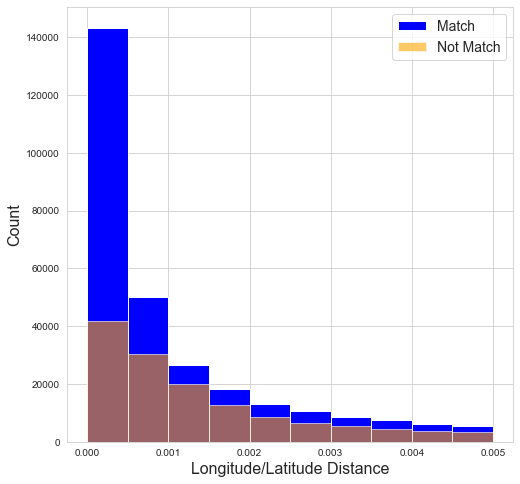

In [11]:
plt.figure(figsize=(8,8))

dist_threshold = 0.005

plt.hist(X[X['match']==True][X['pair dist'] < dist_threshold]['pair dist'],color='blue', label="Match")

plt.hist(X[X['match']==False][X['pair dist'] < dist_threshold]['pair dist'], color='orange', alpha=.6, label="Not Match")


plt.legend(fontsize=14)

plt.xlabel("Longitude/Latitude Distance", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/2796638360.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==True][X['pair dist'] > dist_threshold]['pair dist'],color='blue', label="Match")
/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/2796638360.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==False][X['pair dist'] > dist_threshold]['pair dist'], color='orange', alpha=.6, label="Not Match")


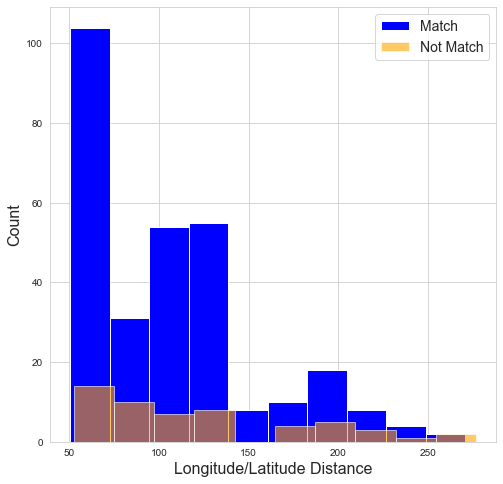

In [12]:
plt.figure(figsize=(8,8))

dist_threshold = 50

plt.hist(X[X['match']==True][X['pair dist'] > dist_threshold]['pair dist'],color='blue', label="Match")

plt.hist(X[X['match']==False][X['pair dist'] > dist_threshold]['pair dist'], color='orange', alpha=.6, label="Not Match")


plt.legend(fontsize=14)

plt.xlabel("Longitude/Latitude Distance", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

In [13]:
X[X['pair dist'] > dist_threshold][X['match']==True].loc[572475]

/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/3328610175.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X[X['pair dist'] > dist_threshold][X['match']==True].loc[572475]


id_1                   E_fd2ae15addaf37
name_1              MTR Central Station
latitude_1                    22.282341
longitude_1                   114.15811
address_1                Des Voeux Rd C
city_1                 Central District
state_1                             NaN
zip_1                               NaN
country_1                            HK
url_1             http://www.mtr.com.hk
phone_1                        28818888
categories_1             Metro Stations
id_2                   E_3689062038c709
name_2          MTR Central Station 中環站
latitude_2                    35.762919
longitude_2                  -83.862265
address_2                           NaN
city_2                              NaN
state_2                              TN
zip_2                               NaN
country_2                            US
url_2             http://www.mtr.com.hk
phone_2                             NaN
categories_2             Metro Stations
match                              True


In [14]:
len(X[X['match']==True])

398786

In [15]:
len(X[X['match']==False])

180121

In [16]:
data['categories']

0                           Bars
1          Brazilian Restaurants
2           Salons / Barbershops
3             Mobile Phone Shops
4            Spanish Restaurants
                   ...          
1138807                      NaN
1138808     Housing Developments
1138809         Airport Services
1138810               BBQ Joints
1138811               Surf Spots
Name: categories, Length: 1138812, dtype: object

In [17]:
180121/398786

0.4516733285521558

In [18]:
data['categories'].head(20)

0                      Bars
1     Brazilian Restaurants
2      Salons / Barbershops
3        Mobile Phone Shops
4       Spanish Restaurants
5                      Spas
6         Capitol Buildings
7     Fast Food Restaurants
8           Sandwich Places
9              Flea Markets
10             Coffee Shops
11      Cafés, Coffee Shops
12        Ramen Restaurants
13      Real Estate Offices
14               Juice Bars
15        Malay Restaurants
16          Massage Studios
17       Convenience Stores
18                      NaN
19                    Lakes
Name: categories, dtype: object

In [19]:
sample = pd.read_csv("sample_submission.csv")

In [20]:
test = pd.read_csv("test.csv")

In [21]:
sample

,id,matches
0,E_00001118ad0191,E_00001118ad0191
1,E_000020eb6fed40,E_000020eb6fed40
2,E_00002f98667edf,E_00002f98667edf
3,E_001b6bad66eb98,E_001b6bad66eb98 E_0283d9f61e569d
4,E_0283d9f61e569d,E_0283d9f61e569d E_001b6bad66eb98


In [22]:
test

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories
0,E_00001118ad0191,Jamu Petani Bagan Serai,5.012169,100.535805,NaN,NaN,NaN,NaN,MY,NaN,NaN,Cafés
1,E_000020eb6fed40,Johnny's Bar,40.434209,-80.564160,497 N 12th St,Weirton,WV,26062.0,US,NaN,NaN,Bars
2,E_00002f98667edf,QIWI,47.215134,39.686088,"Межевая улица, 60",Ростов-на-Дону,NaN,NaN,RU,https://qiwi.com,7.800301e+10,ATMs
3,E_001b6bad66eb98,"Gelora Sriwijaya, Jaka Baring Sport City",-3.014675,104.794374,NaN,NaN,NaN,NaN,ID,NaN,NaN,Stadiums
4,E_0283d9f61e569d,Stadion Gelora Sriwijaya,-3.021727,104.788628,Jalan Gubernur Hasan Bastari,Palembang,South Sumatra,11480.0,ID,NaN,NaN,Soccer Stadiums
